In [1]:
import networkx as nx
import pandas as pd

from random import random, choice

In [2]:
# for visualization
import numpy as np
from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 
from scipy.sparse import csr_matrix

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

    adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
    adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
    
    names = np.array(list(G.nodes))
    
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency)

    if show_names:
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
    
    else:
        
        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width)
    
    return SVG(image)

# Simulation Description
For this simulation, I am attempting to use rules of attraction to dictate how a network can form. I spend a lot of time analyzing the internet, and I want to see if I can simulate what I see in the wild.

On the internet, websites link to websites for a number of reasons, but they can be simplified down to two: homogeneity (like attracts like) and opportunity. Websites are created by people, and we network with other people for the same reasons. We form relationships with others who have similar world views as us, and we form relationships with others who may provide opportunities to us (even if we disagree with them). 

This very rough simulation is just to see what happens when two things interplay: a) when rules determine connectivity, b) when there is very low probability of finding each other to make a connection.

First, I will set some worldviews. I'll just call them 0, 1, and 2. You could consider them leftwing, center, and rightwing. You could also consider them Klingon, Human, and Dog. I will specify a rule that both 0 and 2 can connect with 1, but 0 and 2 will not connect with one another. Their disagreement or misunderstanding is too deep.

I will also specify ten interests. I will later set a rule that interest 0 can link with all other interests, but no other interest linking can occur. If you think of these interests as internet categories, you could consider interest 0 as news, as lots of kinds of websites link to news (blogs, entertainment, social media, etc).

Of course, this is a simplistic experiment. Reality is much more complicated, but let's see what happens. Part of the power of doing network analysis programmatically is being able to set up creative simulations and see what happens.

In [3]:
worldviews = list(range(3))
interests = list(range(10))

print(worldviews)
print(interests)

[0, 1, 2]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


First, we need to create 100 nodes for our graph. I put them in string format as the number is just the label.

In [4]:
nodes = [str(n) for n in list(range(1000))]
print(nodes[0:5])

['0', '1', '2', '3', '4']


Next, let's allow each node to choose two interests. You can think about this as a news website that also covers entertainment.

In [5]:
def capture_node_interests(nodes):

    node_interests = {}

    for node in nodes:

        # flip a coin: if greater than 0.5 pick 2, else pick one
        if random() > 0.5:

            i1 = choice(interests)
            i2 = choice(interests)

            # get another if they are the same
            while i2 == i1:
                i2 = choice(interests)

            node_interests[node] = [i1, i2]

        else:

            i1 = choice(interests)
            node_interests[node] = [i1]

    return node_interests

In [6]:
node_interests = capture_node_interests(nodes)

In [7]:
node_interests

{'0': [9, 1],
 '1': [4, 5],
 '2': [1],
 '3': [4],
 '4': [3, 6],
 '5': [2],
 '6': [6],
 '7': [7],
 '8': [2, 7],
 '9': [6],
 '10': [1, 5],
 '11': [1],
 '12': [1],
 '13': [5],
 '14': [7],
 '15': [0, 7],
 '16': [3, 6],
 '17': [5],
 '18': [9],
 '19': [6, 0],
 '20': [3, 0],
 '21': [4],
 '22': [5, 3],
 '23': [2],
 '24': [2],
 '25': [4, 3],
 '26': [9, 7],
 '27': [7],
 '28': [6, 0],
 '29': [5],
 '30': [8],
 '31': [2, 5],
 '32': [1, 0],
 '33': [4, 3],
 '34': [8, 6],
 '35': [2],
 '36': [0],
 '37': [8, 3],
 '38': [4],
 '39': [5],
 '40': [6, 7],
 '41': [2],
 '42': [9],
 '43': [3, 6],
 '44': [1],
 '45': [9],
 '46': [8],
 '47': [2],
 '48': [8],
 '49': [2],
 '50': [8, 5],
 '51': [2],
 '52': [7],
 '53': [4],
 '54': [8, 4],
 '55': [2, 3],
 '56': [9, 5],
 '57': [4],
 '58': [6, 1],
 '59': [7],
 '60': [6, 8],
 '61': [4],
 '62': [4],
 '63': [4],
 '64': [2, 6],
 '65': [2, 5],
 '66': [8],
 '67': [3],
 '68': [7, 4],
 '69': [2, 7],
 '70': [1, 4],
 '71': [2, 9],
 '72': [0, 8],
 '73': [1, 6],
 '74': [3, 6],
 '75'

Each node also needs to choose one worldview.

In [8]:
def capture_node_worldviews(nodes):

    node_worldviews = {}

    for node in nodes:

        node_worldviews[node] = choice(worldviews)

    return node_worldviews

In [9]:
node_worldviews = capture_node_worldviews(nodes)

In [10]:
node_worldviews

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 1,
 '4': 1,
 '5': 2,
 '6': 2,
 '7': 0,
 '8': 0,
 '9': 1,
 '10': 0,
 '11': 1,
 '12': 2,
 '13': 0,
 '14': 0,
 '15': 2,
 '16': 0,
 '17': 0,
 '18': 1,
 '19': 2,
 '20': 1,
 '21': 2,
 '22': 0,
 '23': 0,
 '24': 1,
 '25': 2,
 '26': 1,
 '27': 1,
 '28': 1,
 '29': 2,
 '30': 0,
 '31': 0,
 '32': 2,
 '33': 0,
 '34': 2,
 '35': 2,
 '36': 0,
 '37': 2,
 '38': 2,
 '39': 0,
 '40': 0,
 '41': 2,
 '42': 1,
 '43': 1,
 '44': 0,
 '45': 2,
 '46': 0,
 '47': 0,
 '48': 2,
 '49': 0,
 '50': 2,
 '51': 0,
 '52': 2,
 '53': 1,
 '54': 2,
 '55': 0,
 '56': 0,
 '57': 0,
 '58': 2,
 '59': 0,
 '60': 0,
 '61': 0,
 '62': 2,
 '63': 1,
 '64': 1,
 '65': 1,
 '66': 2,
 '67': 2,
 '68': 0,
 '69': 1,
 '70': 0,
 '71': 2,
 '72': 0,
 '73': 0,
 '74': 2,
 '75': 2,
 '76': 1,
 '77': 1,
 '78': 2,
 '79': 2,
 '80': 1,
 '81': 2,
 '82': 2,
 '83': 0,
 '84': 1,
 '85': 1,
 '86': 1,
 '87': 1,
 '88': 1,
 '89': 1,
 '90': 2,
 '91': 0,
 '92': 1,
 '93': 2,
 '94': 2,
 '95': 2,
 '96': 2,
 '97': 1,
 '98': 1,
 '99': 1,
 '100': 1,

# Run the Simulation

Now, we need to run the simulation and create the network. Later, we can analyze it.

Rules:
- worldview 1 can link to worldviews 0 and 2
- worldviews 0 and 2 cannot link to each other
- interest 0 can link to all other interests including 0
- other interests can only link within the same interest
- there is only a 10% chance of a connection being made, after the above rules are met

In [11]:
def connect_on_interests(i_0, i_1, debug=False):
    
    if debug:
        print('interest comparison: {} and {}'.format(i_0, i_1))

    if (0 in i_0) | (0 in i_1):

        if debug:
            print('interest 0 found. connect')
        
        return True

    else:
        
        matches = 0

        for i in i_0:

            if i in i_1:
                matches += 1

        if matches > 0:
            if debug:
                print('matching interest(s) found. connect')
                
            return True
        
        else:
            
            if debug:
                print('no matching interests. do not connect')
                
            return False

In [15]:
def connect_on_worldview(wv_0, wv_1, debug=False):
    
    if debug:
        print('worldview comparison: {} and {}'.format(wv_0, wv_1))

    if wv_0 != 1 and wv_1 != 1 and wv_0 != wv_1:
        
        if debug:
            print('worldview clash, do not connect')
            
        return False
    
    else:
        
        if debug:
            print('worldviews compatible. connect')
            
        return True

In [16]:
def create_edgelist(nodes, iterations=1):

    edgelist = []

    for i in range(iterations):

        for node in nodes:

            debug = False

            chosen_node = choice(nodes)

            if debug:
                print('node {} has chosen node {}'.format(node, chosen_node))

            wv_0 = node_worldviews[node]
            wv_1 = node_worldviews[chosen_node]

            if connect_on_worldview(wv_0, wv_1, debug):

                i_0 = node_interests[node]
                i_1 = node_interests[chosen_node]

                if connect_on_interests(i_0, i_1, debug):
                    
                    edgelist.append([node, chosen_node])
                    
                else:
                    
                    edgelist.append([node, node]) # make a link to itself so that an isolate appears

    df = pd.DataFrame(edgelist)
    df.columns = ['source', 'target']

    return df

In [17]:
df = create_edgelist(nodes, iterations=2)

df.head()

,source,target
0,1,330
1,2,2
2,3,3
3,4,987
4,5,5


# Analyze the Network

In [18]:
def show_degree_distribution(G):

    degrees = [degree for node, degree in G.degree()]

    return pd.Series(degrees).plot.hist(bins=10)

In [19]:
G = nx.from_pandas_edgelist(df)
G.remove_edges_from(nx.selfloop_edges(G))

print(G)

Graph with 964 nodes and 641 edges


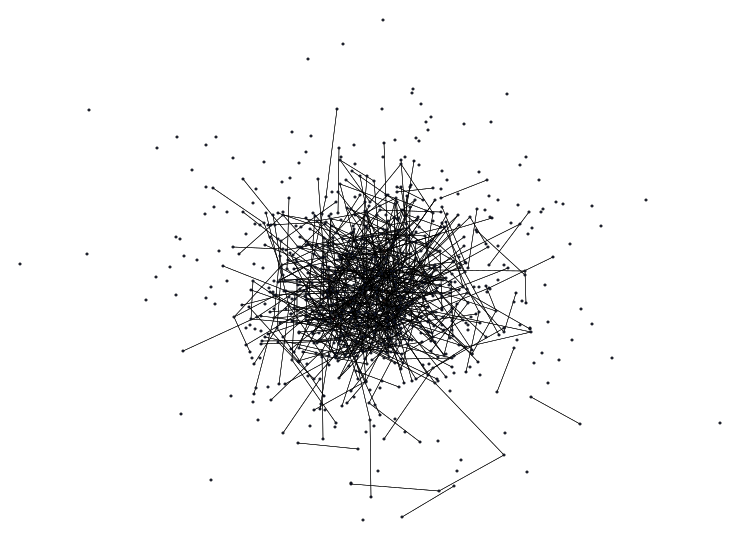

In [20]:
draw_graph(G)

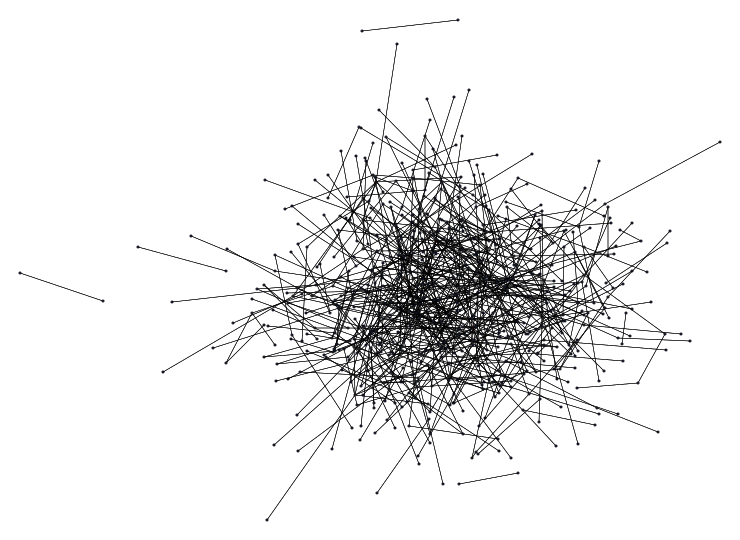

In [21]:
draw_graph(nx.k_core(G,1))

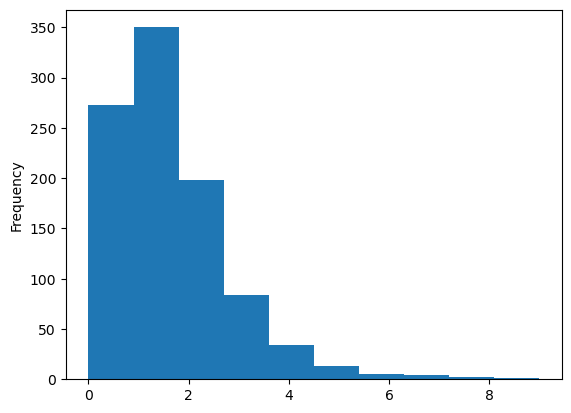

In [22]:
_= show_degree_distribution(G)

In [23]:
metric_df = pd.DataFrame(nx.pagerank(G), index=[0]).T
metric_df.columns = ['pagerank']
metric_df.sort_values('pagerank', ascending=False, inplace=True)
metric_df.head(10)

,pagerank
954,0.004777
476,0.004772
766,0.004498
711,0.004226
174,0.004066
996,0.003978
437,0.003824
491,0.003768
768,0.003655
580,0.003590


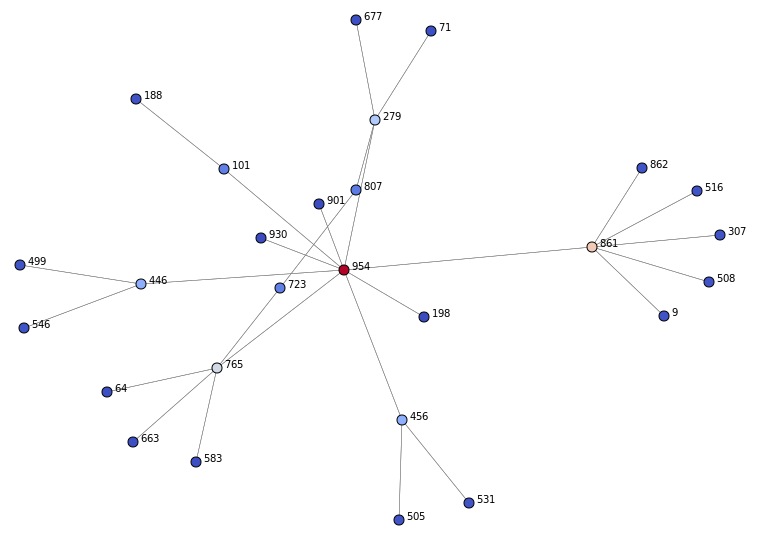

In [25]:
ego = nx.ego_graph(G, '954', radius=2)

draw_graph(ego, show_names=True, node_size=5)

In [26]:
ego_worldviews = []
ego_interests = []

ego_nodes = sorted(ego.nodes)

for node in ego_nodes:
    
    print('node: {}; worldview: {}; interests: {}'.format(node, node_worldviews[node], node_interests[node]))
    
    ego_worldviews.append(node_worldviews[node])
    ego_interests.append(node_interests[node])

node: 101; worldview: 1; interests: [7]
node: 188; worldview: 2; interests: [0, 6]
node: 198; worldview: 1; interests: [2]
node: 279; worldview: 1; interests: [2, 6]
node: 307; worldview: 2; interests: [3, 1]
node: 446; worldview: 0; interests: [9]
node: 456; worldview: 2; interests: [0]
node: 499; worldview: 0; interests: [0, 6]
node: 505; worldview: 2; interests: [9]
node: 508; worldview: 2; interests: [7, 2]
node: 516; worldview: 2; interests: [0]
node: 531; worldview: 2; interests: [4]
node: 546; worldview: 1; interests: [9, 7]
node: 583; worldview: 0; interests: [3]
node: 64; worldview: 1; interests: [2, 6]
node: 663; worldview: 0; interests: [6, 0]
node: 677; worldview: 2; interests: [0]
node: 71; worldview: 2; interests: [2, 9]
node: 723; worldview: 1; interests: [0]
node: 765; worldview: 1; interests: [0]
node: 807; worldview: 1; interests: [9, 2]
node: 861; worldview: 2; interests: [5, 0]
node: 862; worldview: 2; interests: [6]
node: 9; worldview: 1; interests: [6]
node: 901; 

In [27]:
ego_df = pd.DataFrame({'node':ego_nodes, 'worldview':ego_worldviews, 'interest':ego_interests})
ego_df = ego_df.explode('interest')
ego_df.set_index('node', inplace=True)
ego_df.head()

,worldview,interest
node,,
101,1,7
188,2,0
188,2,6
198,1,2
279,1,2


In [28]:
c1 = set(ego_df[ego_df['worldview']==0].index.values)
c2 = set(ego_df[ego_df['worldview']==1].index.values)
c3 = set(ego_df[ego_df['worldview']==2].index.values)

c1

{'446', '499', '583', '663', '930'}

In [29]:
nx.community.modularity(ego, [c1, c2, c3])

0.14609053497942387

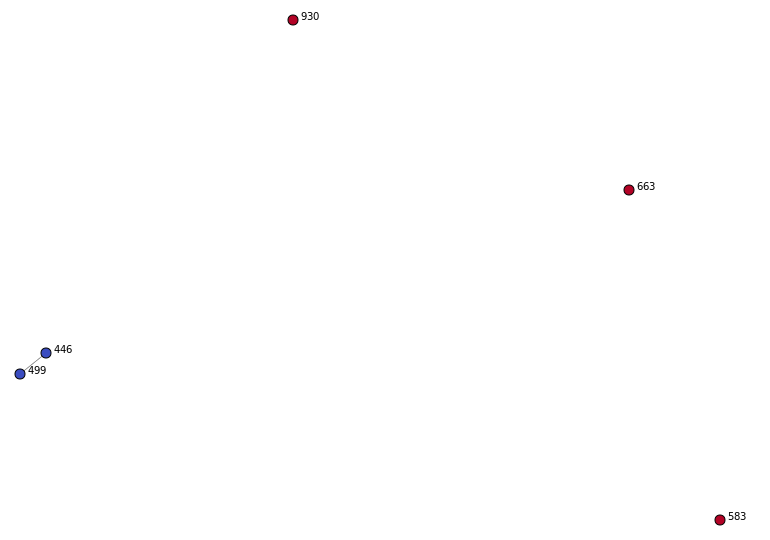

In [30]:
draw_graph(ego.subgraph(c1), show_names=True, node_size=5)

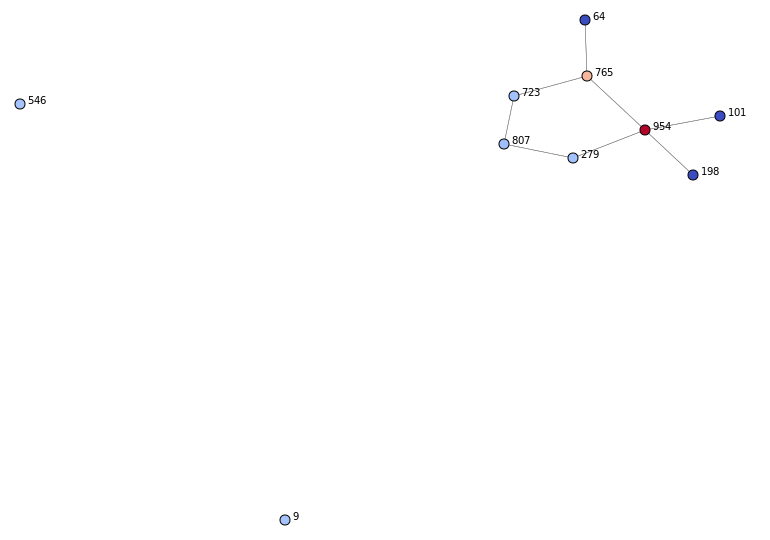

In [31]:
draw_graph(ego.subgraph(c2), show_names=True, node_size=5)

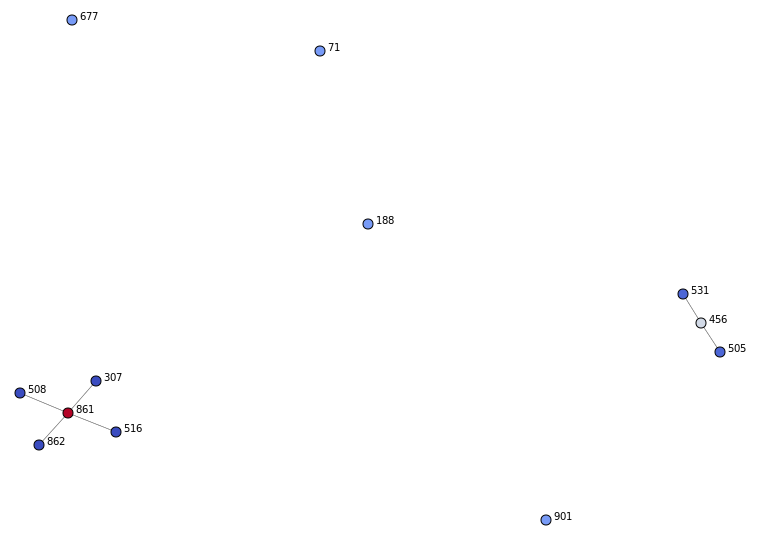

In [32]:
draw_graph(ego.subgraph(c3), show_names=True, node_size=5)